<a href="https://colab.research.google.com/github/aashwinmishra/cryoEM-notebooks/blob/master/TEM_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/aashwinmishra/cryoEM-notebooks

Cloning into 'cryoEM-notebooks'...
remote: Enumerating objects: 565, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 565 (delta 82), reused 110 (delta 56), pack-reused 400
Receiving objects: 100% (565/565), 146.02 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (298/298), done.
Updating files: 100% (90/90), done.


In [2]:
!git clone https://github.com/ViggieSmalls/TEM-Simulator

Cloning into 'TEM-Simulator'...
remote: Enumerating objects: 323, done.
remote: Total 323 (delta 0), reused 0 (delta 0), pack-reused 323
Receiving objects: 100% (323/323), 454.01 KiB | 3.44 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [3]:
# !pip install mdtraj -q
!pip install mrcfile -q
!pip install PyCifRW -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 167.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00


In [4]:
import os
os.chdir('TEM-Simulator')

In [5]:
!cmake CMakeLists.txt

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Warning (dev) at /usr/local/lib/python3.10/dist-packages/cmake/data/share/cmake-3.27/Modules/ExternalProject.cmake:3136 (message):
  The DOWNLOAD_EXTRACT_TIMESTAMP option was not given and policy CMP0135 is
  not set.  The policy's OLD behavior will be used.  When using a URL
  download, the timestamps of extracted files should preferably be that of
  the time of extraction, otherwise code that depends on the extracted
  contents might not be rebuilt if the URL changes.  The OLD behav

In [6]:
!make

[  3%] Creating directories for 'libfftw3'
[  6%] Performing download step (download, verify and extract) for 'libfftw3'
-- Downloading...
   dst='/content/TEM-Simulator/fftw-3.3.7/src/fftw-3.3.7.tar.gz'
   timeout='none'
   inactivity timeout='none'
-- Using src='http://www.fftw.org/fftw-3.3.7.tar.gz'
-- [download 0% complete]
-- [download 1% complete]
-- [download 2% complete]
-- [download 3% complete]
-- [download 4% complete]
-- [download 5% complete]
-- [download 6% complete]
-- [download 7% complete]
-- [download 8% complete]
-- [download 9% complete]
-- [download 10% complete]
-- [download 11% complete]
-- [download 12% complete]
-- [download 13% complete]
-- [download 14% complete]
-- [download 15% complete]
-- [download 16% complete]
-- [download 17% complete]
-- [download 18% complete]
-- [download 19% complete]
-- [download 21% complete]
-- [download 22% complete]
-- [download 23% complete]
-- [download 24% complete]
-- [download 25% complete]
-- [download 26% complete]
-- [

In [8]:
os.chdir('/content/cryoEM-notebooks')

In [9]:
%matplotlib inline
import os, sys, shutil
from distutils.dir_util import copy_tree
import multiprocessing
import concurrent.futures
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('../src/')
# import src.simutils as simutils
import src.cryoemio as cryoemio
# import src.dataviz as dataviz
from src.utils import write_inputfile as write_inputfile
from src.utils import write_inputfiles as write_inputfiles
from src.utils import write_coords as write_coords
from src.utils import run_TEM_simulation as run_TEM_simulation
from src.utils import run_parallel_TEM_simulations as run_parallel_TEM_simulations

In [9]:
# x_coord, y_coord, z_coord = np.random.randint(low=-50, high=50, size=3).tolist()
# x_theta, y_theta, z_theta = np.random.randint(low=0, high=90, size=3).tolist()
# # write_coords(x_coord=0.0, y_coord=0.0, z_coord=0.0, x_theta= 0.0, y_theta=45.0, z_theta= 0.0)
# # write_inputfile()

In [12]:
os.chdir('/content')
!ls

cryoEM-notebooks  sample_data  simulation_0  simulation_1  TEM-Simulator


In [13]:
temp = np.array([[0, 200.0, 1.3, 6000, 30000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                  [1, 200.0, 1.3, 60000, 60000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                 [2, 200.0, 1.3, 60000, 80000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                 [3, 200.0, 1.3, 60000, 90000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                       ])
d = run_parallel_TEM_simulations(temp)
print(len(d))

/usr/local/lib/python3.10/dist-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


4


(1, 400, 400)


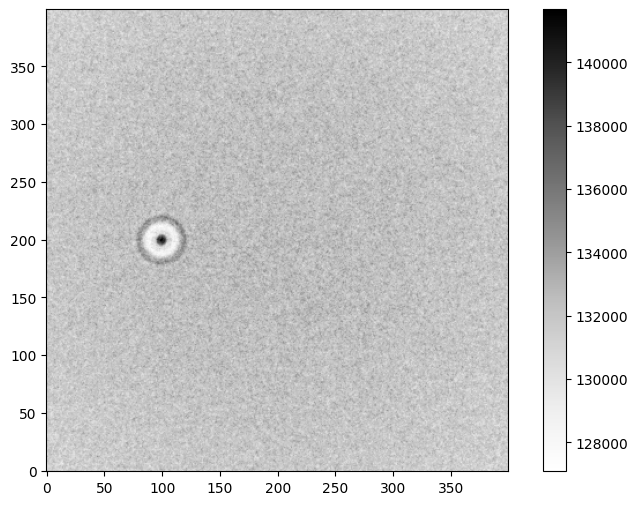

In [34]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


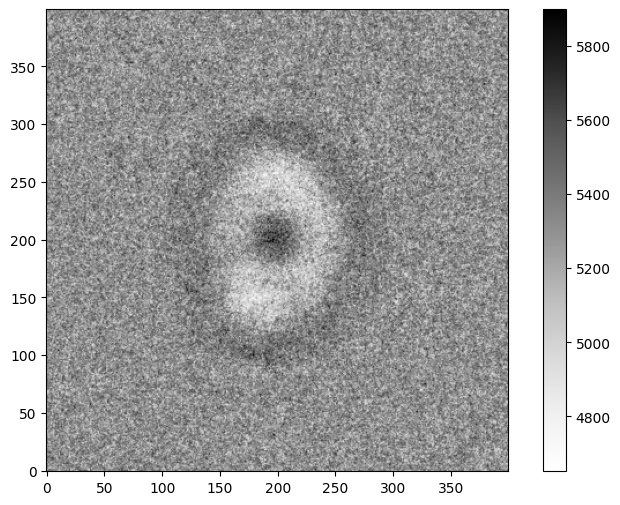

In [43]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


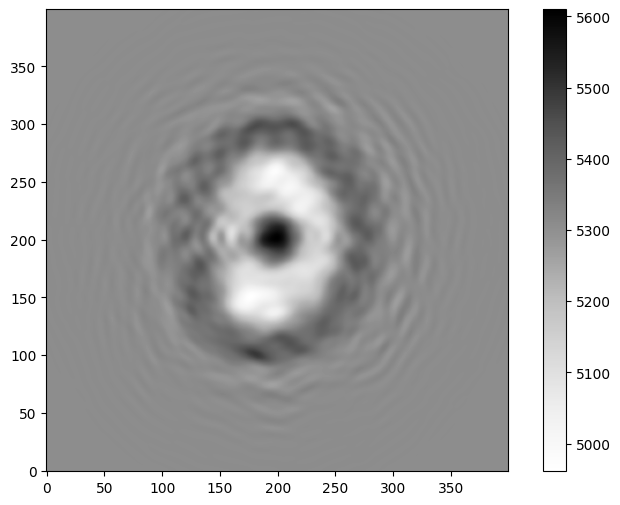

In [39]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


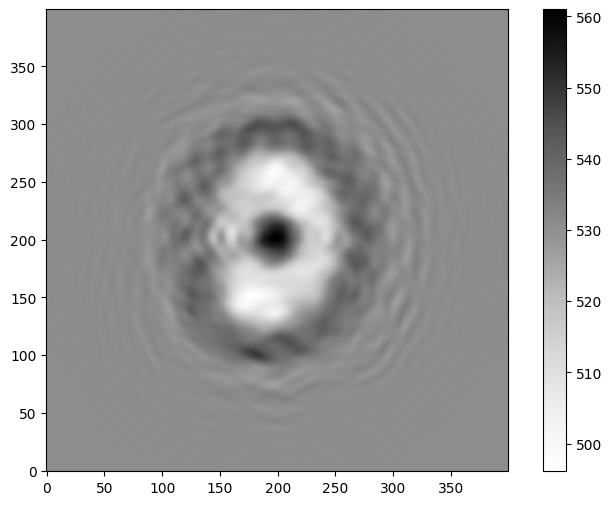

In [36]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


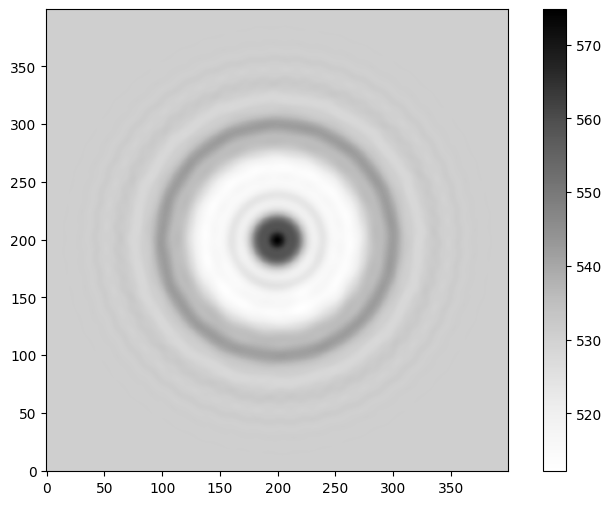

In [33]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


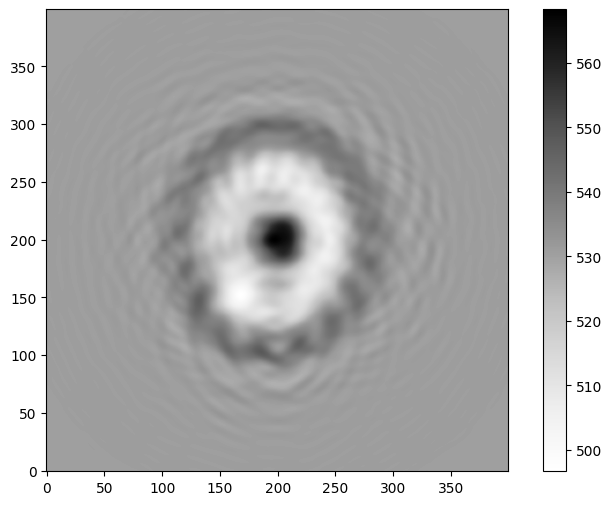

In [30]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


/usr/local/lib/python3.10/dist-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


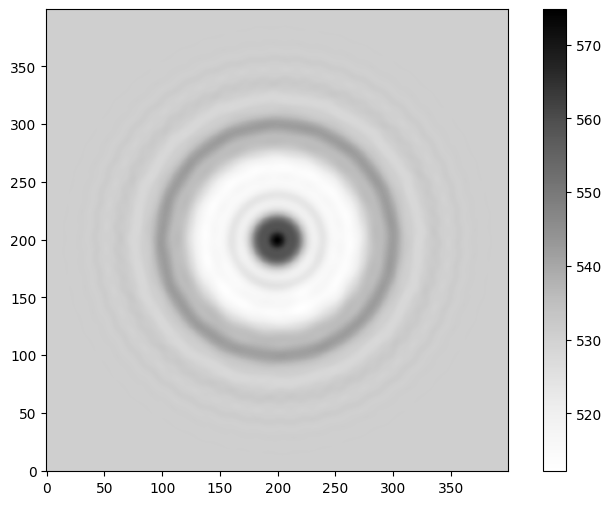

In [27]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


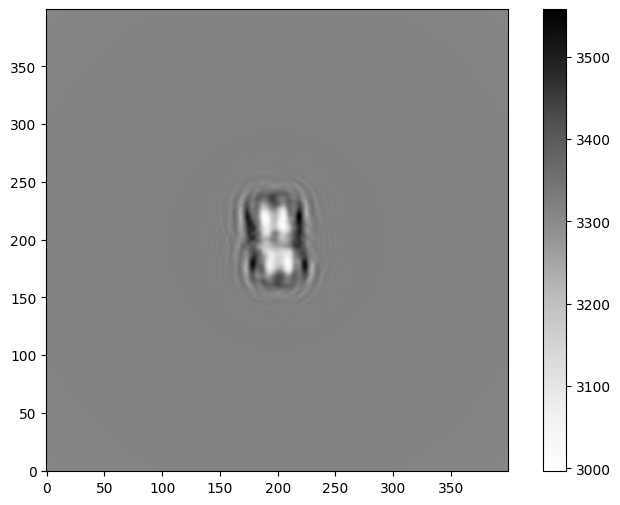

In [22]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

(1, 400, 400)


/usr/local/lib/python3.10/dist-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


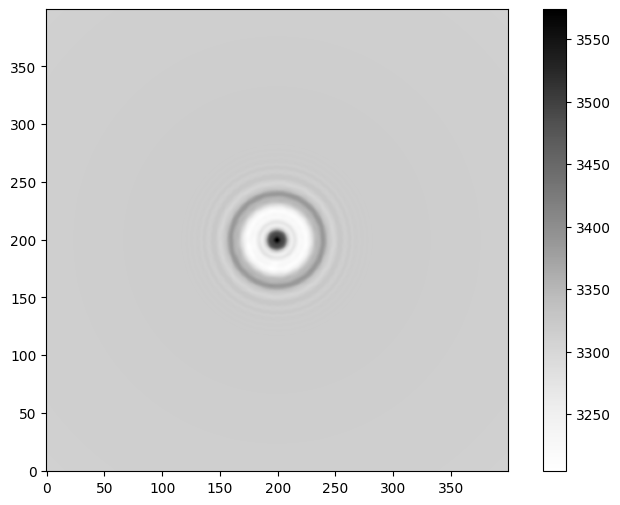

In [19]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()

TODOs:
Function to run multiple calls.
1. subprocess with async or multiprocess pool and call os.system call in pool with num workers.
10 params.
Args:
  Input: torch.tensor -> [N, 10]
  N_threads: Num Workers
Returns:
  Simulations and returns [N, 400, 400]

In [9]:
def write_inputfiles(base_address = "/content/cryoEM-notebooks/notebooks/Material/Data/TMV/",
                    log_file = "simulator.log",
                    pdb_file_in = "2OM3.pdb",
                    pdb_transf_file_in = "2OM3_transf.txt",
                    map_file_re_out = "2OM3_map.mrc",
                    map_file_im_out = "2OM3_abs_map.mrc",
                    particle_coords = "file",
                    coord_file_in = "TMV_coord.txt",
                    acc_voltage = 200,
                    energy_spread = 1.3,
                    total_dose = 60000.0,
                    magnification = 30000.0,
                    cs = 2.0,
                    cc = 2.0,
                    aperture = 50.0,
                    focal_length = 3.0,
                    cond_ap_angle = 0.1,
                    dqe = 0.8,
                    mtf_a = 0.7,
                    mtf_b = 0.2,
                    mtf_c = 0.1,
                    mtf_alpha = 10.0,
                    mtf_beta = 40.0,
                    image_file_out="tiltseries.mrc",
                    ):
  fpath = base_address + "input.txt"
  f = open(fpath, "w")
  f.write("=== simulation ===\n")
  f.write("generate_micrographs = yes\n")
  f.write(f"log_file = {base_address+log_file}\n")
  f.write("=== sample ===\n")
  f.write(f"diameter = 1000\n")
  f.write(f"thickness_edge = 100\n")
  f.write(f"thickness_center = 50\n")
  f.write("=== particle TMV ===\n")
  f.write("source = pdb\n")
  f.write(f"pdb_file_in = {base_address+pdb_file_in}\n")
  f.write(f"pdb_transf_file_in = {base_address+pdb_transf_file_in}\n")
  f.write(f"voxel_size = 0.1\n")
  f.write(f"map_file_re_out = {base_address+map_file_re_out}\n")
  f.write(f"map_file_im_out = {base_address+map_file_im_out}\n")
  f.write("=== particleset ===\n")
  f.write(f"particle_type = TMV\n")
  f.write(f"num_particles = 1\n")
  f.write(f"particle_coords = {particle_coords}\n")
  f.write(f"coord_file_in = {base_address+coord_file_in}\n")
  f.write("=== geometry ===\n")
  f.write(f"gen_tilt_data = yes\n")
  f.write(f"ntilts = 1\n")
  f.write(f"theta_start = 0\n")
  f.write(f"theta_incr = 2\n")
  f.write(f"geom_errors = none\n")
  f.write("=== electronbeam ===\n")
  f.write(f"acc_voltage = {acc_voltage}\n")
  f.write(f"energy_spread = {energy_spread}\n")
  f.write(f"gen_dose = yes\n")
  f.write(f"total_dose = {total_dose}\n")
  f.write("=== optics ===\n")
  f.write(f"magnification = {magnification}\n")
  f.write(f"cs = {cs}\n")
  f.write(f"cc = {cc}\n")
  f.write(f"aperture = {aperture}\n")
  f.write(f"focal_length = {focal_length}\n")
  f.write(f"cond_ap_angle = {cond_ap_angle}\n")
  f.write("gen_defocus = yes\n")
  f.write("defocus_nominal = 5\n")
  f.write("=== detector ===\n")
  f.write("det_pix_x = 400\n")
  f.write("det_pix_y = 400\n")
  f.write("pixel_size = 15\n")
  f.write("gain = 10\n")
  f.write("use_quantization = yes\n")
  f.write(f"dqe = {dqe}\n")
  f.write(f"mtf_a = {mtf_a}\n")
  f.write(f"mtf_b = {mtf_b}\n")
  f.write(f"mtf_c = {mtf_c}\n")
  f.write(f"mtf_alpha = {mtf_alpha}\n")
  f.write(f"mtf_beta = {mtf_beta}\n")
  f.write(f"image_file_out = {base_address+image_file_out}\n")
  f.close()

In [14]:
def run_TEM_simulation(args: np.array) -> np.array:
  """
  Takes a 22 dimensional vector of inputs: index, coords, input_file_args.
  Creates a folder for the data,
  Writes an input.txt and a coord.txt file in folder. Moves pdf files to the folder.
  Runs the TEM-Simulator on these files.
  Returns the micrograph of the simulation as an [1, dim_x, dim_y] numpy vector.
  Args:
    args: A Numpy vector of 22-dims,
    [index, acc_voltage, energy_spread, total_dose, magnification, cs, cc,
    aperture, focal_length, cond_ap_angle, dqe, mtf_a, mtf_b, mtf_c, mtf_alpha,
    mtf_beta,
    x, y, z, theta_x, theta_y, theta_z]
  Returns:
    np.array of dimensions [1, 400, 400] (default dim_x = dim_y = 400)
  """
  # Unpack
  index, acc_voltage, energy_spread, total_dose, magnification, cs, cc, \
  aperture, focal_length, cond_ap_angle, dqe, mtf_a, mtf_b, mtf_c, mtf_alpha, \
  mtf_beta, x, y, z, theta_x, theta_y, theta_z = args.tolist()

  index = int(index)

  base_address = "/content/" + "simulation_" + str(index) + "/"
  if not os.path.exists(base_address):
    os.makedirs(base_address, exist_ok=True)
  #4 Files needed for sim: pdb, transfer, input and coords.
  #copy files for simulation to dir
    copy_tree("/content/TEM-Simulator", base_address+"TEM-Simulator")
    shutil.copyfile("/content/cryoEM-notebooks/notebooks/Material/Data/TMV/2OM3.pdb", base_address+"2OM3.pdb")
    shutil.copyfile("/content/cryoEM-notebooks/notebooks/Material/Data/TMV/2OM3_transf.txt", base_address+"2OM3_transf.txt")
  write_inputfiles(base_address=base_address,
                   acc_voltage=acc_voltage,
                   energy_spread = energy_spread,
                   total_dose=total_dose,
                   magnification=magnification,
                   cs=cs,
                   cc=cc,
                   aperture=aperture,
                   focal_length=focal_length,
                   cond_ap_angle=cond_ap_angle,
                   dqe=dqe,
                   mtf_a=mtf_a,
                   mtf_b=mtf_b,
                   mtf_c=mtf_c,
                   mtf_alpha=mtf_alpha,
                   mtf_beta=mtf_beta)
  write_coords(base_address, x_coord=x, y_coord=y, z_coord=z, x_theta=theta_x, y_theta=theta_y, z_theta=theta_z)
  os.system('{0} {1}'.format(base_address+"TEM-Simulator/TEM-Simulator", base_address+"input.txt"))
  data = cryoemio.mrc2data(mrc_file = base_address+"tiltseries.mrc")
  return data[0,...]

In [11]:
def run_parallel_TEM_simulations(args_array: np.array = None) -> np.array:
  """
  Takes a numpy array of dimesion [num_processes, 22]
  Runs num_processes TEM_simulations in parallel with the inputs.
  Returns a [num_processes, 400, 400] numpy array of images.
  """
  if args_array is None:
    args_array = np.array([[11, 200.0, 1.3, 6000, 30000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [12, 200.0, 1.3, 60000, 60000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                       ])
  sim_results = []
  with concurrent.futures.ProcessPoolExecutor() as executor:
    results = [executor.submit(run_TEM_simulation, args) for args in args_array]

    for f in concurrent.futures.as_completed(results):
      sim_results.append(f.result())

  return np.array(sim_results)

In [11]:
num_processes = os.cpu_count()
num_processes

2

In [88]:
#[index, acc_voltage, energy_spread, total_dose, magnification, cs, cc,
#    aperture, focal_length, cond_ap_angle, dqe, mtf_a, mtf_b, mtf_c, mtf_alpha,
#    mtf_beta, x, y, z, theta_x, theta_y, theta_z]
                    # acc_voltage = 200,
                    # energy_spread = 1.3,
                    # total_dose = 60000.0,
                    # magnification = 30000.0,
                    # cs = 2.0,
                    # cc = 2.0,
                    # aperture = 50.0,
                    # focal_length = 3.0,
                    # cond_ap_angle = 0.1,
                    # dqe = 0.8,
                    # mtf_a = 0.7,
                    # mtf_b = 0.2,
                    # mtf_c = 0.1,
                    # mtf_alpha = 10.0,
                    # mtf_beta = 40.0,
args_array = np.array([[11, 200.0, 1.3, 6000, 30000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                       [12, 200.0, 1.3, 60000, 60000.0, 2.0, 2.0, 50.0, 3.0, 0.1, 0.8, 0.7, 0.2, 0.1, 10.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
                       ])
# mic = run_TEM_simulation(args_array[1])
# _fig = plt.figure(figsize=(9,6))
# plt.imshow(mic, origin='lower', cmap='Greys')
# plt.colorbar()
sim_results = []
with concurrent.futures.ProcessPoolExecutor() as executor:
  results = [executor.submit(run_TEM_simulation, args) for args in args_array]

  for f in concurrent.futures.as_completed(results):
    sim_results.append(f.result())

print(len(sim_results))

/usr/local/lib/python3.10/dist-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


2
